In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('rose-pine-moon')
%matplotlib inline

In [2]:
cpal = [ '#9BF6FF', '#CAFFBF', '#FFD6A5', '#FFADAD', '#FFDBFA', '#B3B3A8']

## 1. Simple Linear Regression

Resource: [PennState | STAT 501 | Lesson 1: Simple Linear Regression](https://online.stat.psu.edu/stat501/lesson/1)

### 1.1. Best fitting line

Let,
- $x_i$: be observed independent variable value.
- $y_i$: be observed dependent variable value.
- $\hat{y_i}$ be predicted dependent variable value.

Then,
$$\hat{y_i} = b_0 + b_1 x_i \\[1em]
y_i = b_0 + b_1 x_i + e_i$$

where,
- $b_0$ is the intercpet of best fit line.
- $b_1$ is the slope of best fit line.
- $e_i = y_i - \hat{y_i}$ are the errors or the resiudals.

There are multiple ways of finding the best fit line. In this chapter we use calculus to find the critical points and maxmimum values.

#### 1.1.1. Derivation

Taking Derivative w.r.t. $b_0$<br><br>
$ \displaystyle
Q = \sum_{i=1}^n (y_i - (b_0 + b_1 x_i))^2 \\[5pt]
\frac{\partial Q}{\partial b_0} = -2 \sum_{i=1}^n (y_i-(b_0 + b_1 x_i))
$
<br><br>Finding the critical point.<br><br>
$\displaystyle
\Rightarrow -\sum_{i=1}^n y_i + b_0\sum_{i=1}^n 1  + b_1 \sum_{i=1}^n (x_i) = 0 \\[5pt]
\Rightarrow nb_0 = \sum_{i=1}^n y_i - + b_1 \sum_{i=1}^n (x_i) \\[5pt]
\Rightarrow b_0 = \frac{\sum_{i=1}^n y_i}{n} - + \frac{b_1 \sum_{i=1}^n (x_i)}{n} \\[5pt]
\Rightarrow b_0 = \bar y - b_1 \bar x
$
<br><br>Let us substitute the value of $b_0$ in equation of *Q*. And then taking derivative w.r.t. to $b_1$:<br><br>
$ \displaystyle
Q = \sum_{i=1}^n (y_i - (\bar y - b_1 \bar x + b_1 x_i ))^2 \\[5pt]
Q = \sum_{i=1}^n (y_i - (\bar y + b_1 (x_i - \bar x)))^2 \\[5pt]
\frac{\partial Q}{\partial b_1} = 2 \sum_{i=1}^n (y_i-\bar y - b_1( x_i - \bar x))\cdot -(x_i - \bar x)
$
<br><br>Finding the critical point.<br><br>
$ \displaystyle
\Rightarrow  -\sum_{i=1}^n (y_i-\bar y)(x_i - \bar x) + b_1\sum_{i=1}^n ( x_i - \bar x)^2 = 0 \\[5pt]
\Rightarrow  b_1 = \frac{\sum_{i=1}^n (y_i-\bar y)(x_i - \bar x)}{\sum_{i=1}^n ( x_i - \bar x)^2}
$
<br><br>Also, $\frac{\partial Q^2}{\partial^2 b_0} = \frac{\partial Q^2}{\partial^2 b_1} = 2$. So the above intercept and slope correspond to the line with least square error.
Note that the sign of slope dependent only on the numerator.

### 1.2. Residuals are Normally Distributed

The following synthetic data is for demonstration purposes and may not be exact representation of real world data.

In [3]:
x = np.arange(1, 11)
y = np.empty((10,5))
for i in x:
    y[i-1] = np.random.normal(i, 1, (5,))
    
x = np.repeat(x, 5)
y = y.reshape(-1)

In [4]:
def get_best_fit_line(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    r_x = (x - x_mean)
    r_y = (y - y_mean)
    b1 = np.sum(r_x * r_y)/ np.sum(r_x**2)
    b0 = y_mean - x_mean * b1
    return (b0,b1)
b = get_best_fit_line(x, y)

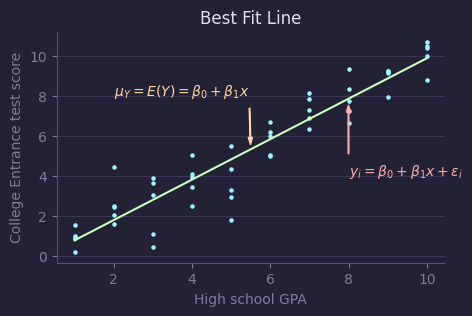

In [5]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)

# main plot
ax.scatter(x, y, s=5, color=cpal[0])
ax.plot(x, b[0] + b[1]*x, color=cpal[1])

# annotations
ax.annotate(text=r'$\mu_Y = E(Y) = \beta_0 + \beta_1 x$', xy=(5.5, b[0] + b[1]*5.5), xytext=(2, 8), color=cpal[2],arrowprops=dict(color=cpal[2], shrink=0.1, width=0.5, headwidth=3, headlength=5))
ax.annotate(text=r'$y_i = \beta_0 + \beta_1 x + \epsilon_i$', xy=(x[35], b[0] + b[1]*x[35]), xytext=(8, 4), color=cpal[3],arrowprops=dict(color=cpal[3], shrink=0.1, width=0.5, headwidth=3, headlength=5))

# figure labels
ax.set_xlabel('High school GPA')
ax.set_ylabel('College Entrance test score')
ax.set_title('Best Fit Line');

Consider the example of gpa of high school students and there score of college entrance test.
- 50 Students with High school GPAs ranging between 0 and 10 (only integers for simplicity) are selected, with 5 students for each GPA score.

- There College entrance test scores are measured.

After plotting, following observations can be made.
- The college entrance test scores seems to be normally distributed corresponding to each high school GPA score.

- If we had lots of data (like more than 100 students for each high school gpa) we would have best fit line passing through the mean of college test scores for each subpopulations.

- Therefore, it is reasonable to assume that the errors for each subpopulation are normally distributed.

The predicted value for population is represented as:
$$\mu_y = E(Y) = \beta_0 + \beta_1 x_i$$
and the actual observation is represented as:
$$y_i =\beta_0 + \beta_1 x_i + \epsilon_i$$


### 1.3. Assumptions of Linear Regression Model


1. **Linear Function**: The mean of the response, $E(Y_i)$, at each value of the predictor, $x_i$, is a Linear function of the $x_i$.

2. **Independent**: The errors, $\epsilon_i$, are Independent.

3. **Normally Distributed**: The errors, $\epsilon_i$, at each value of the predictor, $x_i$, are normally distributed.

4. **Equal variances**: The errors, $\epsilon_i$, at each value of the predictor, $x_i$, have rqual variances.

### 1.4. Common Error Variance

- As seen in the previous example of High shool GPA vs college tests GPA, the variance was kept equal to one for each subpopulation.

- Generally, in most cases this variance is preferred to be as low as possible.

- Sample Variance:<br><br>
$\displaystyle s^2 = \frac{\sum_{i=1}^n (y_i - \bar{y})^2}{n-1}$
<br><br>The sample variance estimates $\sigma^2$, the variance of one population. 

- Since we do not the population mean $\mu$ but we estimate with $\bar{y}$. Doing so cost us 1 degree of freedom and therefore the (n-1) 

- Mean square error:<br><br>
$\displaystyle MSE = \frac{\sum_{i=1}^n (y_i - \bar{y})^2}{n-2}$
<br><br>The mean square error estimates $\sigma^2$, the common variance of the many subpopulations. 

- Since we estimate population intercept $\beta_0$ and slope $\beta_1$, we loose two degrees of freedom and therefore (n - 2).

### 1.5. Sum of Squares

Total sum of squares (SST) can be represented as sum of *regression sum of squares* (SSR) and *error sum of squares* (SSE).
$$SSR = \sum_{i=1}^n (\hat{y_i} - \bar{y})^2 \\[1em]
SSE = \sum_{i=1}^n (y_i - \hat{y_i})^2 \\[1em]
SST = \sum_{i=1}^n (y_i - \bar{y})^2$$

#### 5.1. R-square

The "coefficient of determination" or "R-squared value" is equal to:
$$R^2= \frac{SSR}{SSR + SSE}$$
The properties of $R^2$ are:
1. It lies between 0 and 1.
2. $R^2=1$ means data fits regression line perfectly.
3. $R^2=0$ means regression line in perfectly horizontal. Also *x* does not account for any variation in *y*.

### 1.6. Pearson Correlation Coefficent 

The correlation coefficient, *r*, is directly related to the coefficient of determination $R^2$:
$$r = \pm\sqrt{R^2}$$
Properties:
- The sign depenend on the sign of slope $b_1$
- Furthermore *r* ranges from -1 to 1.
- Also *r* is unitless.

Mathematical Formula of Correlation coefficent:
$$r = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})^2 (y_i - \bar{y})^2}} \\[1em]
r = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2} {\sum_{i=1}^n(y_i - \bar{y})^2}} \times b_1
$$

Intrepretation:
- If *r* = -1, then there is a perfect negative linear relationship between x and y.
- If *r* = 1, then there is a perfect positive linear relationship between x and y.
- If *r* = 0, then there is no linear relationship between x and y.

### 1.7. R-Square Cautions

####  1.7.1. Non-Linear Relationships

- A $R^2 = r = 0$ quantifies that there is no *linear relationship* between *x* and *y*. 
- This does not mean there does not exist any higher orde relationship.

Consider the case of points of a parabola and we can only perfrom simple linear regression (not multiple linear regression with multiple coefficents).

In [6]:
class SLR:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.x_mean = np.mean(x)
        self.y_mean = np.mean(y)
        self.residuals = {'rx': self.x - self.x_mean, 'ry': self.y - self.y_mean}
        self.reg_data = {}
    
    def get_best_fit(self):
        b1 = ( np.sum(self.residuals['rx'] * self.residuals['ry'])/
             np.sum(self.residuals['rx']**2))
        b0 = self.y_mean - self.x_mean * b1
        self.reg_data.update({'b1': b1,'b0': b0,})
        self.yhat = b0 + self.x * b1
        
    def get_regression_analysis(self):
        ssr = np.sum((self.yhat - self.y_mean)**2)
        sst = np.sum(self.residuals['ry']**2)
        rsq = ssr / sst 
        r = np.sign(self.reg_data['b1']) * rsq ** 0.5
        self.reg_data.update({'rsq':rsq, 'r':r})
        
    def fit(self):
        self.get_best_fit()
        self.get_regression_analysis()

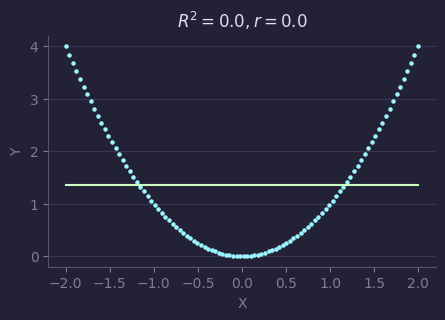

In [7]:
x = np.linspace(-2, 2, 100)
y = x**2
model = SLR(x, y)
model.fit()


fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(x, x**2, s=5, color=cpal[0])
ax.plot(x, model.yhat, color=cpal[1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(r'$R^2 = {}, r = {}$'.format(np.round(model.reg_data['rsq'], 6), np.round(model.reg_data['r'], 6)));

#### 1.7.2. Large R-square

A large $R^2$ value should not be interpreted as meaning that the estimated regression line fits the data well. Another function might better describe the trend in the data.

#### 1.7.3. Outliers

The coefficient of determination $R^2$ and the correlation coefficient *r* can both be greatly affected by just one data point (or a few data points).

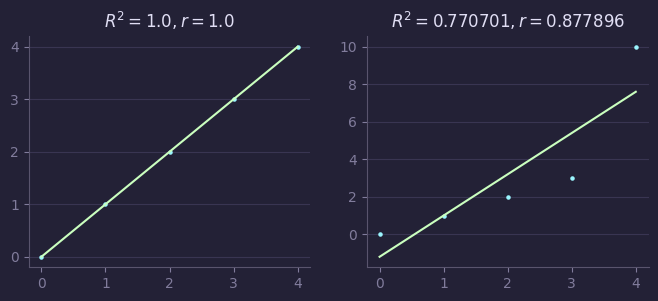

In [8]:
x = np.arange(5)
y = np.array([0, 1,2,3,10])
model1 = SLR(x,x)
model2 = SLR(x,y)
model1.fit()
model2.fit()

fig = plt.figure(figsize=(8,3))
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    if i == 0:
        ax.scatter(x, x, s=5, color=cpal[0])
        ax.plot(x, model1.yhat, color=cpal[1])
        ax.set_title(r'$R^2 = {}, r = {}$'.format(np.round(model1.reg_data['rsq'], 6), np.round(model1.reg_data['r'], 6)))
        
    if i == 1:
        ax.scatter(x, y, s=5, color=cpal[0])
        ax.plot(x, model2.yhat, color=cpal[1])
        ax.set_title(r'$R^2 = {}, r = {}$'.format(np.round(model2.reg_data['rsq'], 6), np.round(model2.reg_data['r'], 6)))

Observations:
- Adding one outlier in drops the $R^2$ from 1 to 0.77.

#### 1.7.4. Correlation & Causation

Example: Ice Cream Sales and Shark Attacks

Suppose we collect data on ice cream sales and shark attacks in a beach town over several summers. We calculate the correlation coefficient and find a strong positive correlation between ice cream sales and shark attacks.

Correlation: 0.8 (strong positive correlation)

At first glance, it might seem like eating ice cream causes shark attacks! However, this is a perfect example of how correlation does not imply causation.

What's really going on:

The underlying factor driving both ice cream sales and shark attacks is actually the weather. During hot summer days, more people visit the beach, leading to:

1. Increased ice cream sales (people buy more ice cream to cool down)
2. Increased shark attacks (more people in the water means a higher chance of shark encounters)

In this case, the correlation between ice cream sales and shark attacks is due to a common underlying factor (weather), not because eating ice cream directly causes shark attacks.

#### 1.7.5. Sample Dependence

Consider the study of skin cancer and mortality rate. Depending where the study is conducted (near poles or near equator) the data might give different linear regression lines.

#### 1.7.6. R-square & P-value

Sometimes it is possible to get a high $R^2$ value and a big p-value, making it statistically insignificant.

#### 1.7.7. Slope & P-value

A "statistically significant" value of $R^2$, does not imply that the slope is meaningfully different from 0.

For lot of hypothesis test it is easier to reject null hypothesis. That is we can get a very small p-value but the slope can still be samll to 0.

### 1.8. Hypothesis Test for Population R square

All this time we have been talking about sample correlation coefficent. That is, it varies from sample to sample.

To estimate the population correlation coefficent $\rho$ we perform hypothesis testing.

1. **Hypotheses**: <br>
*Null hypothesis*: $H_0:\rho = 0$<br>
*Alternative hypothesis*: $H_a: \rho \neq 0$

2. **Test Statistic**: <br><br>
$\displaystyle t^* = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$

3. **P-value**: The p-value is determined by referring to t-distribution with *n-2* degrees of freedom.

`Note`: 
- We may create the SLR class multiple times (instead of inheriting) to keep codes simpler.

- For people who prefer not to code `statsmodels.api.OLS` can be used as alternative.

In [9]:
class SLR:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n = self.x.shape[0]
        self.x_mean = np.mean(x)
        self.y_mean = np.mean(y)
        self.residuals = {'rx': self.x - self.x_mean, 'ry': self.y - self.y_mean}
        
        self.coeff_data = {}
        self.reg_data = {}
    
    def get_best_fit(self):
        b1 = ( np.sum(self.residuals['rx'] * self.residuals['ry'])/
             np.sum(self.residuals['rx']**2))
        b0 = self.y_mean - self.x_mean * b1
        self.yhat = b0 + self.x * b1
        
        for n, i in enumerate((b0, b1)):
            self.coeff_data.update({f'b{n}': i})
        
    def get_regression_analysis(self):
        ssr = np.sum((self.yhat - self.y_mean)**2)
        sst = np.sum(self.residuals['ry']**2)
        rsq = ssr / sst 
        r = np.sign(self.coeff_data['b1']) * rsq ** 0.5
        
        # hypothesis testing for r-square
        if r != 1:
            rsq_test_stat = r * (self.n - 2) / (1 - r**2)**0.5
            p_val = 2 * (1- sc.stats.t.cdf(rsq_test_stat, self.n-2))
        else:
            p_val = 1
        self.reg_data.update({'R-square':rsq, 'P-value': p_val})
        
    def fit(self):
        self.get_best_fit()
        self.get_regression_analysis()
        
    
    def print_summary(self):
        self.print_table(self.reg_data, 'Regression Statistics', ['Term', 'Value'])
        self.print_table(self.coeff_data, 'Coefficents', ['Term', 'Value'])
        
    def print_table(self, data_dict, main_title, title):
        print(f'\n{main_title}')
        temp = 15*(len(title)) - 5
        print('='*temp)
        print(('{:<15}'*len(title)).format(*title))
        print('='*temp)
        for k, v in data_dict.items():
            if type(v) != np.float64:
                print(('{:<15}'*(v.shape[0] + 1)).format(k, *np.round(v, 6))) 
            else:
                print(('{:<15}'*(2)).format(k, np.round(v, 6)))   

Consider the data consisting of temperature at a day and the ice cream sales on that day. We are trying to find whether there is any relation between these two quantities.

In [10]:
df = pd.DataFrame({
    'Temperature (C)': [21,16,14,30,32,21,25,27,35,15],
    'Ice cream sales': [42,18,25,74,112,71,58,47,82,59]
})
data = df.to_numpy().T

model = SLR(data[0], data[1])
model.fit()
model.print_summary()


Regression Statistics
Term           Value          
R-square       0.580455       
P-value        1.3e-05        

Coefficents
Term           Value          
b0             -8.884647      
b1             2.867994       


For a significance level of 0.05 we can reject the null hypothesis and claim that $R^2$ is significant.